# Digging deeper into the dataset related to Open Univeristy student information. 

Firstly, we got an insight into the general student information of students who withdraw: studentInfo.csv 

* As expected, the number of students who withdraw is higher for 0-35 age group, not disabled students male students. This is not significant as more students enrol in this group.

* For the same reasons, more students withdraw from BBB, DDD and FFF code modules

* Increase from 2013 to 2014. More students who enrol in October withdraw compared to January but overall, more student enrol in October. So this is not very significant. 

* More interesting information can be gleaned from the heatmaps
Clearly, fewer students from Ireland, Scotland and Wales (negative correlation)
More students from Midlands, London and the North-West

* imd_bands also give some interesting information:
higher_education is correlated to imd_band: those from 10-30% having A level Quals or less whereas 90-100% having a Post Graduate Qual. This is a presumed trend and it can be observed here. It can also be seen that the students who already have a degree and less likely to withdraw

* While it is not directly relevant, number of previous attempts is more for students who have not attended univeristy before. Hence more the number of studied credits, higher the chance of withdrawal


As a summary, the most positive correlation is with studied credit. This is in turn correlated the most with number of previous attempts. Students who have never been to univeristy or even achieved A Level have the most previous attempts. So this is a causal link. It can also be observed that that higher education is correlated to region and more than that, imd_band. 

There may be other factors affecting the studied credits and pointers like assessments, courses taken and/or VLE engagement. In this data story, attention is given to these factors that might affect student withdrawal.

The dataset has been downoaded from the Open University https://analyse.kmi.open.ac.uk/open_dataset

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

# read the csv file 
df = pd.read_csv('studentInfo.csv')
assessment = pd.read_csv('studentAssessment.csv')
vle = pd.read_csv('studentVle.csv')
unreg = pd.read_csv('studentRegistration.csv')
courses = pd.read_csv('courses.csv')

In [2]:
# get some basic info about the datasets
print(df.columns)
print(df.shape)
print(assessment.columns)
print(assessment.shape)
print(vle.columns)
print(vle.shape)
print(unreg.columns)
print(unreg.shape)

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')
(32593, 12)
Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')
(173912, 5)
Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')
(10655280, 6)
Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')
(32593, 5)


**Part 1: date of withdrawal**

**date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation.**

To get an idea when students withdraw relative to the start date, we can analyse this field

number of students who withdraw: 10033
number of students who withdrew before the start of module presentation: 2643
number of students who withdrew in the first 30 days after the start of the module presentation: 2446
mean module presentation length 255.54545454545453


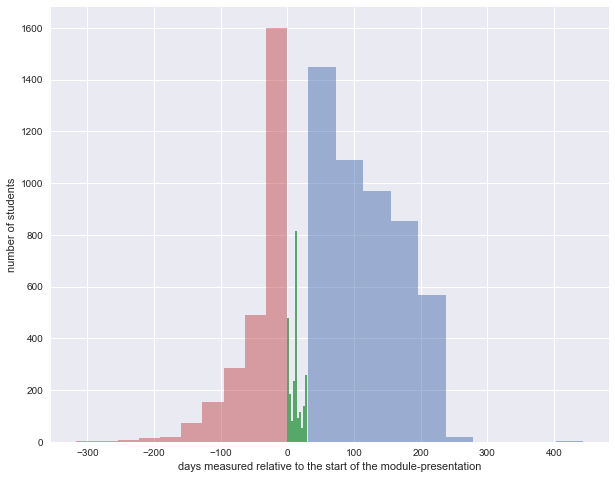

In [3]:
# find out how many students withdraw before the module presentation, in the first month and after that

w_reg = unreg.dropna()
print('number of students who withdraw:',len(w_reg))
neg_reg = w_reg[w_reg['date_unregistration'] < 0]
print('number of students who withdrew before the start of module presentation:',len(neg_reg))
low_reg = w_reg[(w_reg['date_unregistration'] >=0) & (w_reg['date_unregistration'] <= 30)]
print('number of students who withdrew in the first 30 days after the start of the module presentation:',len(low_reg))
print('mean module presentation length',courses.module_presentation_length.mean())
# visual representation
plt.figure(figsize=(10,8))

reg = w_reg[w_reg['date_unregistration'] > 30]
reg.date_unregistration.hist(alpha=0.5)
low_reg.date_unregistration.hist(alpha=1.0)
neg_reg.date_unregistration.hist(alpha=0.5)
plt.xlabel('days measured relative to the start of the module-presentation')
plt.ylabel('number of students')

* 26% of students withdrew before the start of the course, majority just before
* 25% withdraw in the first month

**Part 2: students who are disadvantaged due to their background**

In [4]:
# get overall data for final result
print('Overall final results',df.final_result.value_counts())

#separate students who withdrew
w_students = df[df['final_result'] == 'Withdrawn']
print('Students who withdrew:',w_students.shape)

Overall final results Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64
Students who withdrew: (10156, 12)


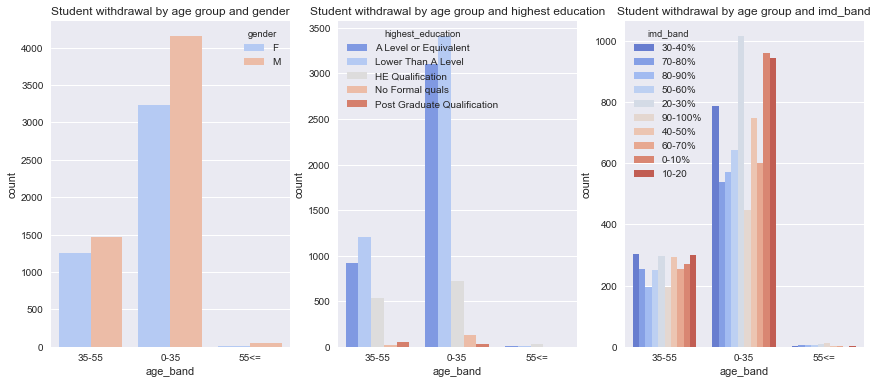

In [5]:
# plot all participants by age and gender
fig1 = plt.figure(figsize=(30,6))

ax1 = fig1.add_subplot(1,6,1)
g = sns.countplot('age_band', data=w_students, palette="coolwarm", hue='gender')
g.set_title("Student withdrawal by age group and gender")


ax2 = fig1.add_subplot(1,6,2)
g = sns.countplot('age_band', data=w_students, palette="coolwarm", hue='highest_education')
g.set_title("Student withdrawal by age group and highest education")

# split participants by age and gender
ax3 = fig1.add_subplot(1,6,3)
g = sns.countplot('age_band', data=w_students, palette="coolwarm", hue='imd_band')
g.set_title("Student withdrawal by age group and imd_band")

In [6]:
# imd_band and highest education in numbers of students
print(df.groupby(['final_result','imd_band']).size())
print(df.groupby(['final_result','highest_education']).size())

final_result  imd_band
Distinction   0-10%        168
              10-20        191
              20-30%       263
              30-40%       315
              40-50%       293
              50-60%       297
              60-70%       299
              70-80%       313
              80-90%       328
              90-100%      358
Fail          0-10%        916
              10-20        912
              20-30%       844
              30-40%       784
              40-50%       697
              50-60%       701
              60-70%       538
              70-80%       599
              80-90%       495
              90-100%      421
Pass          0-10%        996
              10-20       1167
              20-30%      1226
              30-40%      1345
              40-50%      1224
              50-60%      1227
              60-70%      1209
              70-80%      1170
              80-90%      1165
              90-100%     1101
Withdrawn     0-10%       1231
              10

As we have observed before:
* More students who withdraw have A Level or Lower Quals
* They are more likely to be in 0-30% imd_band
* Mostly 0-35 in age

We define these as disadvantaged students or those most at risk.

Lets see how many students who satisfy at least one of the criteria withdraw

In [7]:
# students who start with a disadvantage

low_band = df[(df['imd_band']== '0-10%')| (df['imd_band']== '10-20%')| (df['imd_band']== '20-30%')]
print('Number of students from lower imd_band(0-30%):',low_band.shape)
print(low_band.final_result.value_counts())
print(25*'-')
low_ed = df[(df['highest_education']== 'Lower Than A Level')|(df['highest_education']== 'No Formal quals')]
print('Number of students from A level or lower Quals:',low_ed.shape)
print(low_ed.final_result.value_counts())
print(25*'-')
disadv = df[(df['highest_education']== 'Lower Than A Level')|(df['highest_education']== 'No Formal quals')|(df['imd_band']== '0-10%')| (df['imd_band']== '10-20%')| (df['imd_band']== '20-30%')]
print('Number of students deemed at risk as they have both educational as well as imd_band disadvantage:',disadv.shape)
print(disadv.final_result.value_counts())
print(25*'-')

Number of students from lower imd_band(0-30%): (6965, 12)
Withdrawn      2552
Pass           2222
Fail           1760
Distinction     431
Name: final_result, dtype: int64
-------------------------
Number of students from A level or lower Quals: (13505, 12)
Withdrawn      4769
Pass           4472
Fail           3521
Distinction     743
Name: final_result, dtype: int64
-------------------------
Number of students deemed at risk as they have both educational as well as imd_band disadvantage: (17127, 12)
Withdrawn      6006
Pass           5774
Fail           4299
Distinction    1048
Name: final_result, dtype: int64
-------------------------


In [8]:
print('Disadvantaged students by gender:\n',disadv.gender.value_counts())
print('Disadvantaged students by disability:\n',disadv.disability.value_counts())

Disadvantaged students by gender:
 M    8884
F    8243
Name: gender, dtype: int64
Disadvantaged students by disability:
 N    15157
Y     1970
Name: disability, dtype: int64


    * Out of 32593 enrolled students, 17127 or 52.5% deemed at risk as they have both educational as well as imd_band disadvantage
    * Among these 17127 students, 6006 withdrew or 35%
    * However, out of 10156 students who withdrew overall, 59% of are in the disadvatanged category
    * Gender or diaability does not appear to have a big impact on student withdrawal 

In [9]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
disadv_encoded = pd.get_dummies(disadv, columns=['age_band','gender','disability', 'highest_education','imd_band','region', 'final_result'], drop_first=True)
disadv_encoded.columns

Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn'],
      dtype='object')

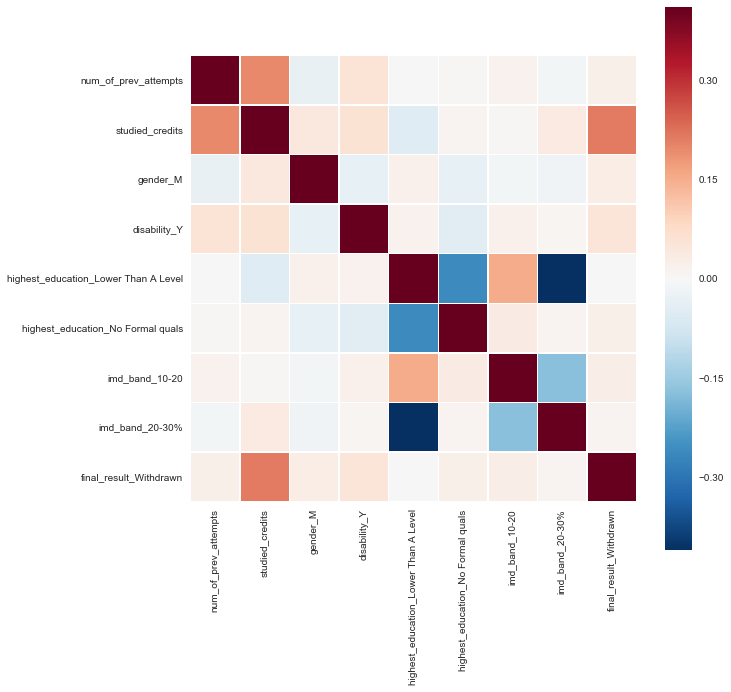

In [10]:
# visual representation of correlations using heatmap
plt.figure(figsize=(10, 10))
features = ['num_of_prev_attempts', 'studied_credits', 'gender_M', 'disability_Y',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'imd_band_10-20',
       'imd_band_20-30%', 'final_result_Withdrawn']
corr = disadv_encoded[features].corr()
sns.heatmap(corr, square = True, linewidths = 0.5, vmax = 0.05)

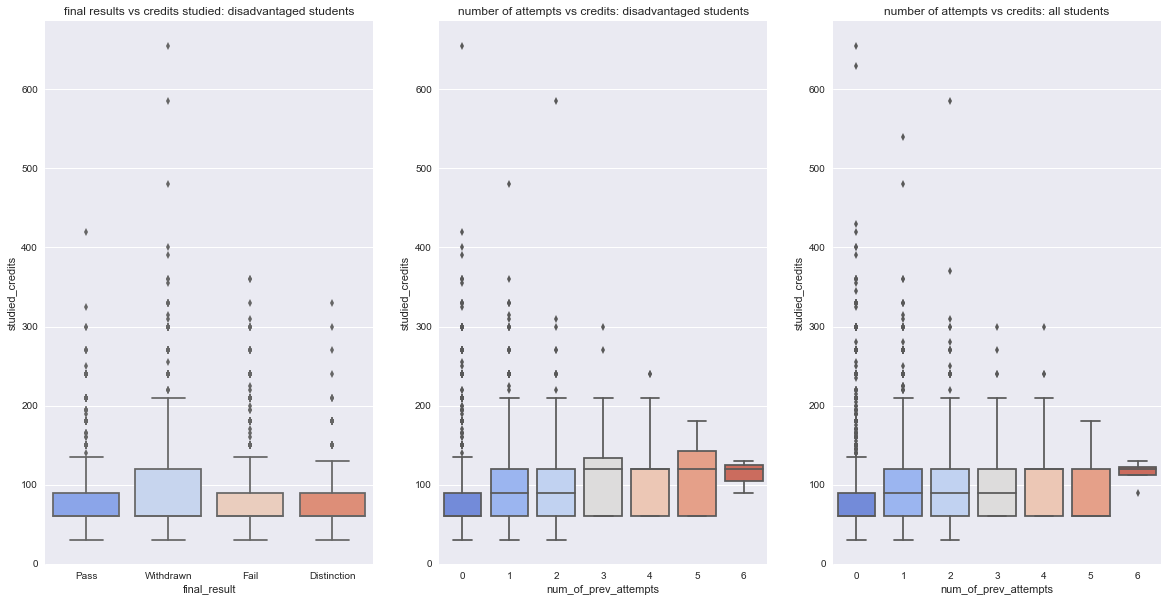

In [11]:
# look at studied_credits as it has the most positive correlation with withdrawal
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,3,1)
g = sns.boxplot(disadv['final_result'], df.studied_credits, palette="coolwarm")
g.set_title("final results vs credits studied: disadvantaged students")

ax2 = fig.add_subplot(1,3,2)
g = sns.boxplot(disadv.num_of_prev_attempts, disadv.studied_credits, palette="coolwarm")
g.set_title("number of attempts vs credits: disadvantaged students")

ax3 = fig.add_subplot(1,3,3)
g = sns.boxplot(df.num_of_prev_attempts, df.studied_credits, palette="coolwarm")
g.set_title("number of attempts vs credits: all students")

In [12]:
# previous attempts: disadvantaged students
disadv.num_of_prev_attempts.value_counts()

0    14721
1     1867
2      406
3       94
4       26
5       10
6        3
Name: num_of_prev_attempts, dtype: int64

In [13]:
# previous attempts: all students
df.num_of_prev_attempts.value_counts()

0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

In [14]:
print(disadv.gender.value_counts())
print(disadv.disability.value_counts())

M    8884
F    8243
Name: gender, dtype: int64
N    15157
Y     1970
Name: disability, dtype: int64


**Part 3: The above analysis shows studied credits and previous attempts is reated to withdrawal.
So who are these students?**

In [15]:
# merge profile and assessment data
merged_score = pd.merge(left=df,right=assessment, left_on='id_student', right_on='id_student')
print(merged_score.head(2))
print(merged_score.shape)

  code_module code_presentation  id_student gender               region  \
0         AAA             2013J       11391      M  East Anglian Region   
1         AAA             2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification  90-100%     55<=                     0              240   

  disability final_result  id_assessment  date_submitted  is_banked  score  
0          N         Pass           1752              18          0   78.0  
1          N         Pass           1753              53          0   85.0  
(207319, 16)


In [16]:
merged_score.final_result.value_counts()

Pass           118025
Fail            32976
Distinction     30344
Withdrawn       25974
Name: final_result, dtype: int64

In [17]:
# separate students who withdrew from the student profile
w_scores = merged_score[merged_score['final_result'] == 'Withdrawn']
print(w_scores.shape)
print('Number of unique student IDs',len(w_scores.id_student.unique()))

(25974, 16)
Number of unique student IDs 4854


We can see that the students ho withdraw have the lowest number of scores. Only 12.5% of the total.
Which leads to the question why the others did not take any assessment.

In [18]:
# descriptive statistics
w_scores.describe()

,id_student,num_of_prev_attempts,studied_credits,id_assessment,date_submitted,is_banked,score
count,2.597400e+04,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25870.000000
mean,7.170354e+05,0.211288,90.955571,26908.467275,77.853969,0.076076,68.867723
std,5.838360e+05,0.511917,44.282627,7331.508423,69.221287,0.265125,21.785431
min,8.462000e+03,0.000000,30.000000,1752.000000,-8.000000,0.000000,0.000000
25%,4.942120e+05,0.000000,60.000000,24293.000000,23.000000,0.000000,57.000000
50%,5.790580e+05,0.000000,90.000000,25357.000000,54.000000,0.000000,73.000000
75%,6.296920e+05,0.000000,120.000000,34874.000000,120.000000,0.000000,85.000000
max,2.698535e+06,6.000000,355.000000,37443.000000,608.000000,1.000000,100.000000


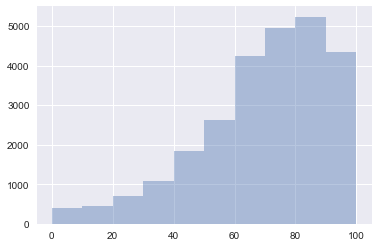

In [19]:
# histogram of all scores of withdrawn students
w_scores.score.hist(alpha=0.4)

number of low scores: 3011
number of unique student id: 1462


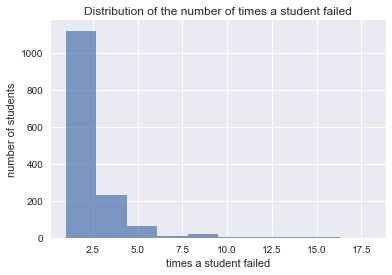

In [20]:
# find how many students have scores lower than 40
low_scores = w_scores[w_scores['score'] <= 40]
print('number of low scores:',len(low_scores))
print('number of unique student id:', len(low_scores.id_student.unique()))

# get number of students who failed more than once
count = low_scores.id_student.value_counts()

# plot number of times a student has failed 
plt.hist(count, alpha=0.7)
plt.xlabel('times a student failed')
plt.ylabel('number of students')
plt.title('Distribution of the number of times a student failed')

** From the above graphs, we can observe that students who withdraw do have lower scores but it is not very significant. Neither do scores seem to be a big factor in this decision**

** Part 4: Lastly looking at the VLE engagement and student withdrawal**

In [21]:
# merge profile and assessment data
merged_clicks = pd.merge(left=df,right=vle, left_on='id_student', right_on='id_student')
print(merged_clicks.shape)
print(merged_clicks.head(2))

(13006575, 17)
  code_module_x code_presentation_x  id_student gender               region  \
0           AAA               2013J       11391      M  East Anglian Region   
1           AAA               2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification  90-100%     55<=                     0              240   

  disability final_result code_module_y code_presentation_y  id_site  date  \
0          N         Pass           AAA               2013J   546669    -5   
1          N         Pass           AAA               2013J   546662    -5   

   sum_click  
0         16  
1         44  


In [22]:
# separate students who withdrew from the student profile
withdraw_clicks = merged_clicks[merged_clicks['final_result'] == 'Withdrawn']
print(withdraw_clicks.shape)
withdraw_students_clicks = withdraw_clicks.id_student.unique()
print('Unique id:',len(withdraw_students_clicks))
print(merged_clicks.sum_click.describe())
print(25*'-')
print(withdraw_clicks.sum_click.describe())

(1830536, 17)
Unique id: 6769
count    1.300658e+07
mean     3.706290e+00
std      8.962795e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.977000e+03
Name: sum_click, dtype: float64
-------------------------
count    1.830536e+06
mean     3.485032e+00
std      8.405775e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.958000e+03
Name: sum_click, dtype: float64


Of the students who have stayed in the module, it is fairly safe to say VLE does not seem to have a big influence

** Part 5: disabled students analysis **

In [23]:
# view the analysis for disabled candidates
disabled = df[df['disability'] == 'Y']
not_disabled = df[df['disability'] == 'N']

print(disabled['gender'].value_counts())
print('So in all %3.2f percent disabled students are male' %((len(disabled[disabled.gender == 'M']))/(len(disabled))*100))
print('whereas %3.2f percent disabled students are female' %((len(disabled[disabled.gender == 'F']))/(len(disabled))*100))
print("-"*30)
print("Looking at highest education attained by disabled students")
print("-"*30)
print(disabled['highest_education'].value_counts())
print("-"*30)
print('Lower than A level: %3.2f percent' %((len(disabled[disabled.highest_education == 'Lower Than A Level']))/(len(disabled))*100))
print('A Level or Equivalent: %3.2f percent' %((len(disabled[disabled.highest_education == 'A Level or Equivalent']))/(len(disabled))*100))
print('HE Qualification: %3.2f percent' %((len(disabled[disabled.highest_education == 'HE Qualification']))/(len(disabled))*100))
print('No Formal quals : %3.2f percent' %((len(disabled[disabled.highest_education == 'No Formal quals']))/(len(disabled))*100))
print("-"*30)
print("Comparing it with all students:")
print("-"*30)
print(not_disabled['highest_education'].value_counts())
print("-"*30)
print('Lower than A level: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'Lower Than A Level']))/(len(not_disabled))*100))
print('A Level or Equivalent: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'A Level or Equivalent']))/(len(not_disabled))*100))
print('HE Qualification: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'HE Qualification']))/(len(not_disabled))*100))
print('No Formal quals: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'No Formal quals']))/(len(not_disabled))*100))



F    1621
M    1543
Name: gender, dtype: int64
So in all 48.77 percent disabled students are male
whereas 51.23 percent disabled students are female
------------------------------
Looking at highest education attained by disabled students
------------------------------
Lower Than A Level       1552
A Level or Equivalent    1432
HE Qualification          175
No Formal quals             5
Name: highest_education, dtype: int64
------------------------------
Lower than A level: 49.05 percent
A Level or Equivalent: 45.26 percent
HE Qualification: 5.53 percent
No Formal quals : 0.16 percent
------------------------------
Comparing it with all students:
------------------------------
A Level or Equivalent          12613
Lower Than A Level             11606
HE Qualification                4555
No Formal quals                  342
Post Graduate Qualification      313
Name: highest_education, dtype: int64
------------------------------
Lower than A level: 39.44 percent
A Level or Equivalent: 42.

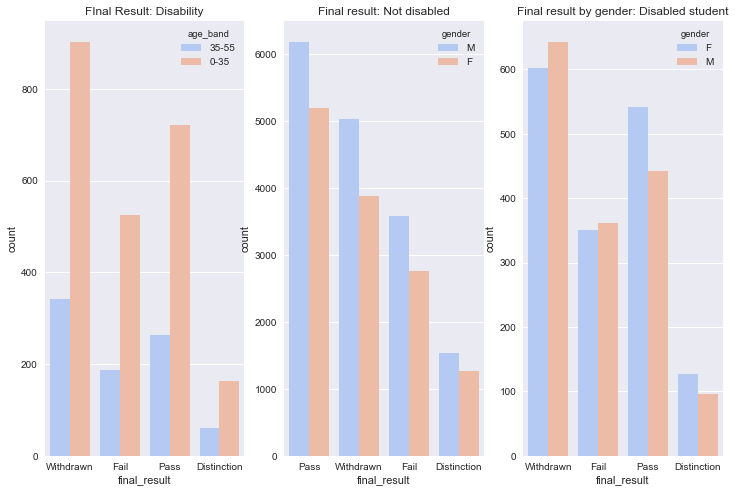

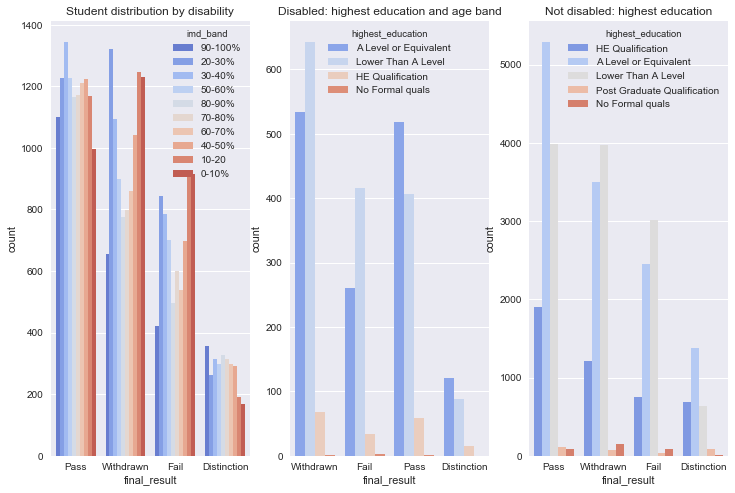

In [24]:
# plot all final results 
fig = plt.figure(figsize=(25,8))

ax1 = fig.add_subplot(1,6,1)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='age_band')
g.set_title("FInal Result: Disability")

# view results by age 
ax2 = fig.add_subplot(1,6,2)
g = sns.countplot('final_result', data=not_disabled, palette="coolwarm", hue='gender')
g.set_title("Final result: Not disabled")

# view results by gender
ax3 = fig.add_subplot(1,6,3)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='gender')
g.set_title("Final result by gender: Disabled student")

# visualise the above numbers
fig = plt.figure(figsize=(25,8))

ax4 = fig.add_subplot(1,6,1)
g = sns.countplot('final_result', data=df, palette="coolwarm", hue='imd_band')
g.set_title("Student distribution by disability")

ax5 = fig.add_subplot(1,6,2)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='highest_education')
g.set_title("Disabled: highest education and age band")


ax6 = fig.add_subplot(1,6,3)
g = sns.countplot('final_result', data=not_disabled, palette="coolwarm", hue='highest_education')
g.set_title("Not disabled: highest education")

It looks like male disabled students in the 0-35 age group should also be in the "at risk" category

In [30]:
new_disadv = df[(df['highest_education']== 'Lower Than A Level')|(df['highest_education']== 'No Formal quals')|(df['imd_band']== '0-10%')| (df['imd_band']== '10-20%')| (df['imd_band']== '20-30%')|((df['age_band']== '0-35')&(df['gender']== 'M')&(df['disability']== 'Y'))]
print('Number of students deemed at risk as they have both educational as well as imd_band disadvantage, are disabled, male and in the 0-35 age group:',new_disadv.shape)
print(new_disadv.final_result.value_counts())
print(25*'-')

Number of students deemed at risk as they have both educational as well as imd_band disadvantage, are disabled, male and in the 0-35 age group: (17597, 12)
Withdrawn      6170
Pass           5952
Fail           4391
Distinction    1084
Name: final_result, dtype: int64
-------------------------


We now have the profile for upto 60.5% of students who withdraw